<a href="https://colab.research.google.com/github/woodRock/grokking-deep-learning/blob/main/chapter_5_generalizing_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 5 | Generalizaing Gradient Descent

If you combine weights in a way that allows you to calculate an error function and a dela, gradient descent can show you how to move the weight combinations and error functions for which gradient descent is useful. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# The Neuron | 1-0-1 ANN | A simple neural network

Here is the basic gradient descent algorithm for a simple network. This can be generalized to work for multiple inputs, and this can be generalized to handle multiple inputs.

For a 1-0-1 ANN the prediction is the product of the _input_ the network's single _weight_. This is analogous to neuron, with single input and output, and no hidden layers.

Weight: 0.499 Pred: 1.0 Error: 0.25
Weight: 0.49405968095846503 Pred: 0.990079680639488 Error: 0.2401780933757026
Weight: 0.48921738100219975 Pred: 0.9803561867514051 Error: 0.23074206615035078
Weight: 0.4844711553699455 Pred: 0.9708256131926617 Error: 0.22167675803824588
Weight: 0.47981909788574933 Pred: 0.9614841323007015 Error: 0.21296760436533138
Weight: 0.47525934019340654 Pred: 0.952327992356238 Error: 0.2046006126690249
Weight: 0.47079005100609295 Pred: 0.9433535160764919 Error: 0.19656234021738814
Weight: 0.4664094353708847 Pred: 0.9345570991383226 Error: 0.18883987241151395
Weight: 0.4621157339478702 Pred: 0.925935208730663 Error: 0.1814208020364335
Weight: 0.4579072223035656 Pred: 0.917484382135674 Error: 0.17429320932720543
Weight: 0.4537822102183489 Pred: 0.90920122533805 Error: 0.1674456428181616
Weight: 0.44973904100763495 Pred: 0.9010824116619176 Error: 0.16086710094453993
Weight: 0.4457760908565187 Pred: 0.8931246804347766 Error: 0.15454701436694518
Weight: 0.4418917681

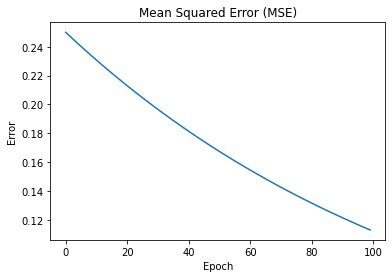

In [5]:
input = 2 #@param {type: "float"} {allow-input: true}
weight = 0.5 #@param {type: "float"} {allow-input: true}
goal = 0.5 #@param {type: "float"} {allow-input: true}
alpha = 0.001 #@param {type: "float"} {allow-input: true}
epochs = 100

def neural_network(weight, input, goal):
    """ A simple 1-0-1 Aritificial Neural Network. 

    Args: 
        weight - the weight for the artificial neuron. 
        input - the input to the network. 
        output - the network output (or prediction). 

    Returns: 
        errors - the history of the networks errors (for plotting).
    """
    errors = [] 
    for epoch in range(epochs):
        # Prediction is product of input and weight.
        pred = input * weight
        # Square Error (SE) 
        error = (pred - goal) ** 2
        # Pure error
        delta = pred - goal 
        # Weight update delta is product of delta and input.
        # Multiply the detla by the input for reversal, scaling and stopping.
        weight_delta = delta * input 
        # Update weight by weight delta scaled by learning rate (alpha).
        weight -= weight_delta * alpha

        # Every 5 epochs, print the network state. 
        if epoch % 5 == 0: 
            print(f"Weight: {weight} Pred: {pred} Error: {error}")
        errors.append(error) 

    return errors 

# Plot the error curve for the neural network.
plt.title("Squared Error (SE)")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.plot(neural_network(weight, input, goal))

## Mulitple inputs | A more complex neural network

The _delta_ $\Delta$ is a measure of how much higher or lower you want a node's value to be, to predict prefectly given the current training example. 

$ \Delta = (\hat{y} -y) $ 

The _delta weight_ $\Delta w$ is a derived-based estimate of the direction and amount you should move a weight to reduce _delta_, accounting for scaling, negative reversal, and stopping.

For a network with multiple inputs, the process is the same. Instead we can calculate a vector of weight detlas, you multiple them by the learning rate $\alpha$ and substract them from the previous weights.

$ w := w - \alpha \Delta w$

Iteration: 0, pred: 0.8600000000000001, error: 0.01959999999999997, delta: -0.1399999999999999, weights: [0.1, 0.2, -0.1], weight_deltas:[-1.189999999999999, -0.09099999999999994, -0.16799999999999987]
Iteration: 5, pred: 0.9047381217162285, error: 0.009074825454152101, delta: -0.09526187828377153, weights: [0.105131037741109, 0.2003923734743201, -0.09927561820125519], weight_deltas:[-0.809725965412058, -0.061920220884451496, -0.11431425394052583]
Iteration: 10, pred: 0.9351798181846276, error: 0.004201655970577936, delta: -0.06482018181537241, weights: [0.10862241126084446, 0.20065936086112338, -0.09878271841023371], weight_deltas:[-0.5509715454306655, -0.04213311817999207, -0.0777842181784469]
Iteration: 15, pred: 0.9558936266398004, error: 0.0019453721709893272, delta: -0.044106373360199624, weights: [0.11099808839856033, 0.20084103028930164, -0.09844732869667382], weight_deltas:[-0.3749041735616968, -0.028669142684129758, -0.052927648032239545]
Iteration: 20, pred: 0.96998817163872

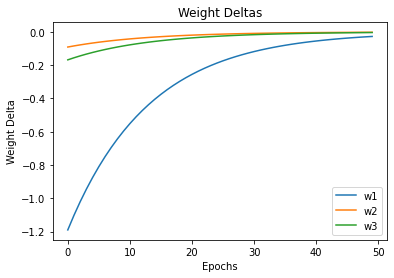

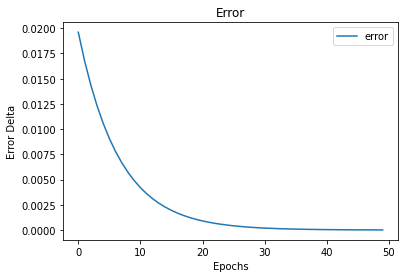

In [10]:
def neural_network(input, weights):
    """ Neural network with multiple inputs, and a single output. 

    Here is a neural network with 3-0-1 architecture. That is 3 inputs, no hidden
    layers, and 1 output layer. It returns the prediction given as the dot
    product of the input and its weights. The dot product is another phrase for 
    the weighted sum of the input and its weights.
    
    Args: 
        input ([float]): The input to network. 
        weights ([float]): The parameters of the network. 
    
    Returns:
        prediction (float): The weighted sum (dot product) of the inputs and weights.
    """
    n = len(input)
    out = sum([i*w for i,w in zip(input,weights[:n])])
    return out    

def ele_mul(scalar, vector):
    """ Elementwise multiplication of a scalar and a vector. 

    In this case, for a network with multiple inputs and single output. The scalar
    is the pure error from the output layer, the vector is the inputs. 

    Any time you perform a mathematical operation between two vectors of equal length 
    where you pair up values acccording to their position in the vector 
    (i.e. position 0 with 0, position 1 with 1, etc), it's called an elementwise operation.

    In this case, a scalar and vector are not of equal length. So we simply multiply 
    each element in the vector by the scalar. The output is a vector of equal length 
    to the input vector, scaled by a factor of the scalar.

    Args: 
        scalar (float): A pure error when compared to output, a scalar.
        vector ([float]): The input to the network, a vector.

    Returns: 
        out ([float]): the weight deltas, the amount to update each weight by, a vector.
    """
    out = [0,0,0]
    n = len(out)
    out = [v*scalar for v in vector]
    return out 

# Learning rate for the network.
alpha = 0.001 #@param {type: "float"} {allow-input: true}

# Input 
# Average number of toes.
toes = [8.5, 9.5, 9.9, 9.0]
# Win-loss record.
wlrec = [0.65, 0.8, 0.7, 0.9]
# Number of fans.
nfans = [1.2, 1.3, 0.5, 1.0]

win_or_lose_binary = [1, 1, 0, 1]
true = win_or_lose_binary[0]

# Intial parameters for the neural network.
weights = [0.1, 0.2, -0.1]
# Input corresponds to every entry for the first game of the season.
input = [toes[0], wlrec[0], nfans[0]]

errors = []
weight_deltas = []

# Train the network over 50 training epochs.
for i in range(50):
    # Prediction is dot product of input and its weights.
    pred = neural_network(input, weights)
    # Squared Error (SE)
    error = (pred - true) ** 2
    errors.append(error)
    # Pure error
    delta = (pred - true)
    # Calculate the weight update.
    weight_delta = ele_mul(delta, input)
    weight_deltas.append(weight_delta)
    if i % 5 == 0:
        print(f"Iteration: {i}, pred: {pred}, error: {error}, delta: {delta}, weights: {weights}, weight_deltas:{weight_delta}")
    
    # Apply the weight update. Adjust by weight_delta scaled by alpha. 
    weights = [w - alpha * dw for w,dw in zip(weights,weight_delta)]

# Flip for plotting; Epochs as x-axis, error as y-axis.
weight_deltas = np.array(weight_deltas).T

# Plot the weight deltas for each of neural networks 3 weights.
for i,w_d in enumerate(weight_deltas):
    plt.plot(w_d, label=f"w{i+1}")
plt.xlabel("Epochs")
plt.ylabel("Weight Delta")
plt.title("Weight Deltas")
plt.legend()
plt.show()

# Plot the global error curve for the network as a whole.
plt.plot(errors, label="error")
plt.title('Squared Error (SE)')
plt.xlabel("Epochs")
plt.ylabel("Error Delta")
plt.title("Error")
plt.legend()
plt.show()

We can make curves for each weight delta $\Delta w$ to error $(\hat{y} - y)^2$. Here we see that $w_1$ has the steepest curve, this is because it has the largest input (toes), a higher input value corresponds to a higher derivitive. The toes input has a larger impact than the win record and number of fans. 

More of the learning happens on the weight with the largest input. Normalization is a technique that counteracts this, and encourages learning across all weights. Note, the slope difference between weights meant a smaller learning rate $\alpha = 0.001$ was required to prevent divergence. The network breaks with learning rate $\alpha = 0.01$, it diverges, $w_1$ diverges.

## Freezing Weights

If we freeze the first weight $w_1$, and set learning rate $\alpha=0.1$, the network can still converge on zero error, while only training two weights $w_1, w_2$. The error curve is ameasure of each individual weight relative to the global error. This error is shared across all weights, so when one weight finds the optima, all weights find it.

If a network accidentally learns to predict the training data without $w_1$, then it will never learn to encorporate toes $i_1$ into its prediction. 

The goal of a neural network is to find the minima on the error plane. That is the optimal set of parameters $\theta$ that give the lowest error. That error is determined entirely by the training data. 

Iteration: 0, pred: 0.8600000000000001, error: 0.01959999999999997, delta: -0.1399999999999999, weights: [0.1, 0.2, -0.1], weight_deltas:[0, -0.09099999999999994, -0.16799999999999987]
Iteration: 5, pred: 0.9500445306641994, error: 0.002495548916560118, delta: -0.04995546933580064, weights: [0.1, 0.23142493687609642, -0.04198473192105279], weight_deltas:[0, -0.032471055068270416, -0.05994656320296077]
Iteration: 10, pred: 0.9821746505959991, error: 0.0003177430813747165, delta: -0.017825349404000934, weights: [0.1, 0.24263813309390575, -0.02128344659586636], weight_deltas:[0, -0.011586477112600607, -0.02139041928480112]
Iteration: 15, pred: 0.9936394736032037, error: 4.045629604434246e-05, delta: -0.0063605263967962955, weights: [0.1, 0.24663927937829924, -0.013896714993909143], weight_deltas:[0, -0.004134342157917592, -0.007632631676155554]
Iteration: 20, pred: 0.9977304065616093, error: 5.1510543755862416e-06, delta: -0.002269593438390727, weights: [0.1, 0.2480669875248569, -0.011260

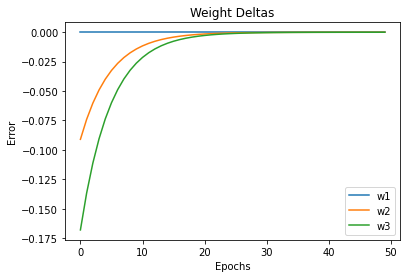

In [ ]:
def neural_network(input, weights):
    """ Neural network with multiple inputs, and a single output. 

    Here is a neural network with 3-0-1 architecture. That is 3 inputs, no hidden
    layers, and 1 output layer. It returns the prediction given as the dot
    product of the input and its weights. The dot product is another phrase for 
    the weighted sum of the input and its weights.
    
    Args: 
        input ([float]): The input to network. 
        weights ([float]): The parameters of the network. 
    
    Returns:
        prediction (float): The weighted sum (dot product) of the inputs and weights.
    """
    n = len(input)
    out = sum([i*w for i,w in zip(input,weights[:n])])
    return out    

def ele_mul(scalar, vector):
    """ Elementwise multiplication of a scalar and a vector. 

    In this case, for a network with multiple inputs and single output. The scalar
    is the pure error from the output layer, the vector is the inputs. 

    Any time you perform a mathematical operation between two vectors of equal length 
    where you pair up values acccording to their position in the vector 
    (i.e. position 0 with 0, position 1 with 1, etc), it's called an elementwise operation.

    In this case, a scalar and vector are not of equal length. So we simply multiply 
    each element in the vector by the scalar. The output is a vector of equal length 
    to the input vector, scaled by a factor of the scalar.

    Args: 
        scalar (float): A pure error when compared to output, a scalar.
        vector ([float]): The input to the network, a vector.

    Returns: 
        out ([float]): the weight deltas, the amount to update each weight by, a vector.
    """
    out = [0,0,0]
    n = len(out)
    out = [v*scalar for v in vector]
    return out 

# Learning rate for the neural network.
alpha = 0.001 #@param {type: "float"} {allow-input: true}

# Inputs 
# Average number of toes
toes = [8.5, 9.5, 9.9, 9.0]
# Win-loss record as ratio. 
wlrec = [0.65, 0.8, 0.7, 0.9]
# Number of fans
nfans = [1.2, 1.3, 0.5, 1.0]

win_or_lose_binary = [1, 1, 0, 1]
true = win_or_lose_binary[0]

# Intial parameters for the neural network.
weights = [0.1, 0.2, -0.1]
# Input corresponds to every entry for the first game of the season.
input = [toes[0], wlrec[0], nfans[0]]

errors = []
weight_deltas = []

# Train the network for 50 epochs to fit the first instance of the dataset.
for i in range(50):
    pred = neural_network(input, weights)
    # Square error
    error = (pred - true) ** 2
    errors.append(error)
    # Pure error 
    delta = (pred - true)
    # Weight update (for 3-0-1 network).
    weight_delta = ele_mul(delta, input)
    # Freeze the first weight w1.
    weight_delta[0] = 0 
    weight_deltas.append(weight_delta)

    if i % 5 == 0:
        print(f"Iteration: {i}, pred: {pred}, error: {error}, delta: {delta}, weights: {weights}, weight_deltas:{weight_delta}")
    weights = [w - alpha * dw for w,dw in zip(weights,weight_delta)]

weight_deltas = np.array(weight_deltas).T
for i,w_d in enumerate(weight_deltas):
    plt.plot(w_d, label=f"w{i+1}")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Weight Deltas")
plt.legend()

## Gradient Descent with Multiple Outputs

Gradient descent can be extened to handle multiple outputs. Uou can calculate each _delta_ the same way would for an individual ouutput, and then multiply them all by the same input. This becomes each weights' _weight_delta_.

In this example, instead of predicting a team win/loss, we also predict if they are happy or sad and the percentage of the team members who are hurt. These become the outputs, win-loss, % of team sad, % of team injured. This network takes a single input, the current win-loss record.

As before _weight_detlas_ are computed by multipling the input node value with the output node _delta_ for each weight. In this caxe, the _weight_deta_s share the same input node and have unique output nodes (_deltas_).

In [11]:
def ele_mul(scalar, vector):
    """ Elementwise multiplication of a scalar and a vector. 

    In this case, for a network with single input and multiple outputs. The scalar
    is the input, a single element. The vector is the output, a multi-output prediction.

    Any time you perform a mathematical operation between two vectors of equal length 
    where you pair up values acccording to their position in the vector 
    (i.e. position 0 with 0, position 1 with 1, etc), it's called an elementwise operation.

    In this case, a scalar and vector are not of equal length. So we simply multiply 
    each element in the vector by the scalar. The output is a vector of equal length 
    to the input vector, scaled by a factor of the scalar.

    Args: 
        scalar (float): The input is a scalar.
        vector ([float]): The output is a vector.

    Returns: 
        out ([float]): the scalar-vector elementwise multiplication, a vector.
    """
    out = [v*scalar for v in vector]
    return out

def scalar_ele_mul(number, vector):
    """Scalar elementwise mulitpliccation of a scalar and a vector.
    
    Args: 
        number (float): the input is a scalar. 
        vector([float]): the paramters of the network are a vector. 

    Returns: 
        out ([float]): the scalar-vector elementwise multiplication, a vector.
    """
    output = [number * v for v in vector]
    return output 

def neural_network(input, weights):
    """ The prediction is the elementwise multiplication between input and weights.

    This is a neural network with single input, no hidden layers, and multiple outputs. 

    Args:
        input (float): the input to the network is a vector. 
        weights ([float]): the parameters of the network. 

    Returns: 
        pred ([float]): the elementwise multiplication between the input and weights.
    """
    pred = ele_mul(input, weights)
    return pred 

# Learning rate for the network.
alpha = 0.1 #@param {type: "float"} {allow-input: true}

# The parameters for the network.
weights = [0.3, 0.2, 0.9]

# Input - the teams current win-loss record.
wlrec = [0.6, 1.0, 1.0, 0.9]

# Output
# The percentage of team injured.
hurt = [1.0, 0.0, 0.0, 0.1]
# The win-loss record for the game.
win = [1, 1, 0, 1]
# The percentage of team sad. 
sad = [0.1, 0.0, 0.1, 0.2]

# The network takes a single input, the current win-loss record.
input = wlrec[0]
# The desired output for the first prediction.
true = [hurt[0], win[0], sad[0]]

# The prediction is the elementwise multiplication of the input and weights.
pred = neural_network(input, weights)

error = [0, 0, 0]
delta = [0, 0, 0]

# Evaluate the error and pure error each output.
# Calculate the loss function, loss for the first instance.
for i in range(len(true)):
    # Square error (SE)
    error[i] = (pred[i] - true[i]) ** 2 
    # Pure error
    delta[i] = pred[i] - true[i]

# Calculate the weight updates.
weight_detlas = scalar_ele_mul(input, weights)

# Apply the weight updates.
for i in range(len(weights)):
    weights[i] -= weight_deltas[i] * alpha

print(f"Weights: {weights}")
print(f"Weight Deltas: {weight_deltas}") 

Weights: [array([0.419     , 0.41018061, 0.40201485, 0.39445428, 0.38745403,
       0.3809726 , 0.37497151, 0.36941519, 0.36427066, 0.3595074 ,
       0.35509715, 0.35101377, 0.34723301, 0.34373245, 0.34049133,
       0.33749042, 0.33471191, 0.33213932, 0.3297574 , 0.327552  ,
       0.32551005, 0.32361944, 0.32186894, 0.32024818, 0.31874754,
       0.31735811, 0.31607166, 0.31488055, 0.31377771, 0.31275661,
       0.31181119, 0.31093583, 0.31012535, 0.30937493, 0.30868013,
       0.30803683, 0.3074412 , 0.30688971, 0.3063791 , 0.30590633,
       0.3054686 , 0.3050633 , 0.30468805, 0.30434061, 0.30401891,
       0.30372106, 0.30344528, 0.30318995, 0.30295353, 0.30273464]), array([0.2091    , 0.20842558, 0.20780114, 0.20722297, 0.20668766,
       0.20619202, 0.20573312, 0.20530822, 0.20491481, 0.20455057,
       0.20421331, 0.20390105, 0.20361194, 0.20334425, 0.2030964 ,
       0.20286691, 0.20265444, 0.20245771, 0.20227557, 0.20210692,
       0.20195077, 0.20180619, 0.20167233, 0.20154

## Gradient Descent with Multiple Inputs and Outputs

Here train a neural network architecture with mulitple inputs and multiple outputs over a single instance. The network makes prediction as a vector-matrix multplication between the input and weights. We calculate the weight update as the pure error between the network prediction and the desired output, multiplied by the input (for scaling, negative reversal, and stopping) scaled by the learning rate.

In [15]:
def w_sum(a,b):
    """ This function performs a scalar, the weighted sum between two vectors.

    You muyltiply each input by its respective weight and then sum all the local predictions together. 
    This is called the _weighted sum of th einput_ or a _weighted sum_ for short. 
    The _weighted sum_ is often referred to as the _dot product_ in deep learning.

    Args: 
        a ([float]): the first term, a vector. 
        b ([float]): the second term, a vector.

    Returns:
        output (float): the weighted sum, a scalar.
    """
    assert(len(a) == len(b))
    output = sum([a*b for a,b in zip(a,b)])
    return output

def vect_mat_mul(vect, matrix):
    """ 
    This function iterates through each row of weights (each row is a vector)
    and makes a prediction using the w_sum function.

    It is performing three weighted sums and then storing their predictions in
    a vector called output.

    Args: 
        vect ([float]): the first term, a vector. 
        matrix ([[float]]): the second term, a matrix.

    Returns: 
        vector ([float]): a series of weighted sums, vector.
    """
    assert(len(vect) == len(matrix))
    output = [0,0,0]
    for i in range(len(vect)):
        output[i] = w_sum(vect,matrix[i]) 
    return output 

def outer_product(a,b):
    """ Outer product - This function returns the weight update matrix. 

    We multiply the deltas by their corresponding elementwise input. 
    The deltas are the pure error for each output in the network. 
    The input tells us how much to scale the delta by. 
    
    By taking the outer product, we find out how much each relative contribution of
    each weight had to the pure error for each output node. Mulitplying the weights
    by the input also performs scaling, negative reversal, and stopping. 

    Args:
        a ([float]): An input vector. 
        b ([[float]]): The deltas matrix.

    Returns: 
        out_product ([[float]]): The weight updates matrix. 
    """
    # Initialize weight update matrix as zeros. 
    out = np.zeros((len(a), len(b)))
    # For each input. 
    for i in range(len(a)):
        # For each output.
        for j in range(len(b)):
            # Product of delta (pure error) and respective input. 
            out[i][j] = a[i] * b[j]
    return out

def neural_network(input, weights):
    """ The neural network with mutliple inputs and weights is a matrix multiplication.

    For each output node, it calculates the dot product between the input and its weights.
    The network returns A series of weighted susm (dot products) of the inputs and the weights
    corresponding to each output node. 
    
    Args:
        input ([float]): the input to the network, a vector. 
        weights ([[float]]): the parameters of the network, a matrix. 

    Returns:
        pred ([float]): A series of dot products of inputs and weights for each output.
    """
    pred = vect_mat_mul(input,weights)
    return pred 

# Learning rate for the network.
alpha = 0.1 #@param {type: "float"} {allow-input: true}

# The parameters for the network, a matrix.
weights = [[0.1, 0.1, -0.3],
           [0.1, 0.2, 0.0],
           [0.0, 1.3, 0.1]]

# Inputs, a vector.
toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 1.0, 1.0, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

# Outputs, a vector.
hurt = [0.1, 0.0, 0.0, 0.9]
win = [1,1,0,1]
sad = [0.1, 0.0, 0.1, 0.2]

# First instance.
input = [toes[0], wlrec[0], nfans[0]]
true = [hurt[0], win[0], sad[0]]

# Training epochs.
epochs = 10
pred = neural_network(input,weights)

error = [0, 0, 0]
delta = [0, 0, 0]

# Calculate the square error and pure error for first instance.
for i in range(len(true)):
    error[i] = (pred[i] - true[i]) ** 2
    delta[i] = pred[i] - true[i]

# Calulcate the weight update.
weight_deltas = outer_product(input,delta) 

# Apply the weight update.
for i in range(len(weights)):
    for j in range(len(weights[0])):
        weights[i][j] -= alpha * weight_deltas[i][j]

print(f"Weights: {weights}")
print(f"Weight Deltas: {weight_deltas}") 

Weights: [[0.09613250000000001, 0.10017000000000001, -0.3073525], [0.09970425000000001, 0.20001300000000002, -0.0005622500000000001], [-0.000546, 1.300024, 0.09896200000000001]]
Weight Deltas: [[ 3.8675  -0.17     7.3525 ]
 [ 0.29575 -0.013    0.56225]
 [ 0.546   -0.024    1.038  ]]


## Gradient Descent with Multiple Inputs and Outputs


pred: [0.555, 0.9800000000000001, 0.9650000000000001], goal: [0.1, 1, 0.1], error: [0.20702500000000007, 0.0003999999999999963, 0.7482250000000001]
pred: [0.11416482154918006, 0.9462890745890551, 0.9027644453951783], goal: [0.1, 1, 0.1], error: [0.0002006421695201157, 0.0028848635085000876, 0.6444307547906283]
pred: [0.01966289504006391, 0.9390624566795344, 0.8894229969468324], goal: [0.1, 1, 0.1], error: [0.006454050433343789, 0.0037133841859336263, 0.6231886681085185]
pred: [-0.0005955020899434116, 0.9375132851342985, 0.8865629879402429], goal: [0.1, 1, 0.1], error: [0.010119455040727811, 0.003904589534707475, 0.6186813339974827]
pred: [-0.004938298786659523, 0.9371811889163146, 0.8859498872301184], goal: [0.1, 1, 0.1], error: [0.011012046552238228, 0.003946203025967751, 0.6177172252370358]


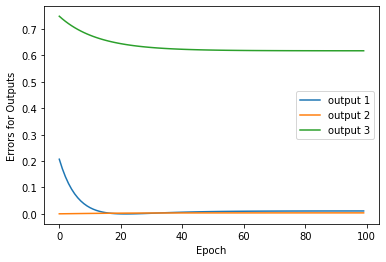

In [20]:
def w_sum(a,b):
    """ The weighted sum of two vectors. 
    
    The weighted sum of two vectors, a.k.a. the dot product.

    Args: 
        a ([float]): first term, a vector. 
        b ([float]): second term, a vector.

    Returns:
        output (float): the weighted sum to two vectors. 
    """
    assert(len(a) == len(b))
    output = sum([a*b for a,b in zip(a,b)])
    return output

def vect_mat_mul(vect, matrix):
    """ Vector-matrix multiplication 

    This function iterates through each row of weights (each row is a vector)
    and makes a prediction using the w_sum function.

    It is performing three weighted sums and then storing their predictions in
    a vector called output.

    Args: 
        vect ([float]): the first term, a vector. 
        matrix ([[float]]): the second term, a matrix.

    Returns: 
        vector ([float]): a series of weighted sums, vector.
    """
    assert(len(vect) == len(matrix))
    output = [0,0,0]
    for i in range(len(vect)):
        output[i] = w_sum(vect,matrix[i]) 
    return output 

def outer_product(a,b):
    """ Outer product - This function returns the weight update matrix. 

    We multiply the deltas by their corresponding elementwise input. 
    The deltas are the pure error for each output in the network. 
    The input tells us how much to scale the delta by. 
    
    By taking the outer product, we find out how much each relative contribution of
    each weight had to the pure error for each output node. Mulitplying the weights
    by the input also performs scaling, negative reversal, and stopping. 

    Args:
        a ([float]): An input vector. 
        b ([[float]]): The deltas matrix.

    Returns: 
        out_product ([[float]]): The weight updates matrix. 
    """
    out = np.zeros((len(a), len(b)))
    for i in range(len(a)):
        for j in range(len(b)):
            out[i][j] = a[i] * b[j]
    return out

def neural_network(input, weights):
    """ The neural network with mutliple inputs and weights is a matrix multiplication.

    For each output node, it calculates the dot product between the input and its weights.
    The network returns A series of weighted susm (dot products) of the inputs and the weights
    corresponding to each output node. 
    
    Args:
        input ([float]): the input to the network, a vector. 
        weights ([[float]]): the parameters of the network, a matrix. 

    Returns:
        pred ([float]): A series of dot products of inputs and weights for each output.
    """
    pred = vect_mat_mul(input,weights)
    return pred 

# Learning rate for the network.
alpha = 0.1 #@param {type: "float"} {allow-input: true}

# The parameters of the network, a matrix.
weights = [[0.1, 0.1, -0.3],
           [0.1, 0.2, 0.0],
           [0.0, 1.3, 0.1]]

# Input
toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 1.0, 1.0, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

# Output
hurt = [0.1, 0.0, 0.0, 0.9]
win = [1,1,0,1]
sad = [0.1, 0.0, 0.1, 0.2]

# First instance
input = [toes[0], wlrec[0], nfans[0]]
true = [hurt[0], win[0], sad[0]]
alpha = 0.001

# Number of iterations to train for.
epochs = 100
errors = []

# Fit the network to the first instance for 100 epochs.
for epoch in range(epochs): 
    # Prediction is the vector-matrix multiplication between the input and weights. 
    pred = neural_network(input,weights)

    error = [0, 0, 0]
    delta = [0, 0, 0]

    # Calculate the square and pure error for the instance.
    for i in range(len(true)):
        error[i] = (pred[i] - true[i]) ** 2
        delta[i] = pred[i] - true[i]
    errors.append(error)

    # Calculate the weight update.
    weight_deltas = outer_product(input,delta) 

    # Apply the weight update.
    for i in range(len(weights)):
        for j in range(len(weights[0])):
            weights[i][j] -= alpha * weight_deltas[i][j]

    # Show the networks progress every 20 epochs.
    if epoch % 20 == 0:
        print(f"pred: {pred}, goal: {true}, error: {error}")
        # print(f"Weights: {weights}")
        # print(f"Weight Deltas: {weight_deltas}") 

# Flip axis; Error as y-axis, Epochs as x-axis.
errors = np.array(errors).T

# Plot the error for each output node of the network over training.
for i, error in enumerate(errors): 
    plt.plot(error, label=f"output {i+1}")
plt.xlabel("Epoch") 
plt.ylabel("Error")
plt.ylabel("Errors for Outputs")
plt.legend()

## MNIST Project

The Modified National Instutude of Standards and Technology (MNIST) dataset consists of difits that highschool students and employees of the US Census Bureau handwrote some years ago. These handwritten digits are black-and-white images of peoples' handwriting. Accompanying each digit image is the actual number they were writing (0-9). For the lwas few decased people have been using this dataset to train neural entworks to read human handwriting.

epoch: 0, Error: 402203.6870080674, validation: 43204.277844208395
epoch: 200, Error: 65.49343590188842, validation: 5151.279807154436
epoch: 400, Error: 15.584451577389258, validation: 4720.148319545051
epoch: 600, Error: 5.038906946421681, validation: 4538.647305631303
epoch: 800, Error: 1.9796260149795808, validation: 4451.296585406966
epoch: 1000, Error: 0.9041754685247085, validation: 4406.688034083665
epoch: 1200, Error: 0.4661823916688291, validation: 4382.676088076304
epoch: 1400, Error: 0.26518711639039694, validation: 4369.03001672558
epoch: 1600, Error: 0.16316607234440939, validation: 4360.818288717002
epoch: 1800, Error: 0.10665700356939711, validation: 4355.579331609418


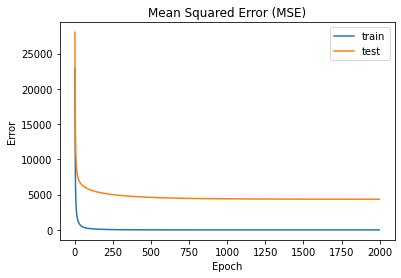

In [89]:
from keras.datasets import mnist
import random
import numpy as np

alpha = 0.001 #@param {type: "Float"} {allow-input: true}
epochs = 2000 #@param {type: "Float"} {allow-input: true}
size = 100 #@param {type: "Float"} {allow-input: true}

# Load the MNIST dataset.
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Take first size instances from each set.
X_train, X_test = X_train[:size], X_test[:size]
y_train, y_test = y_train[:size], y_test[:size]
# Flatten each image into 1x784 vectors.
X_train, X_test = [np.concatenate(i) for i in X_train], [np.concatenate(i) for i in X_test]
input_dim, output_dim = 784, 10

def onehot_encoding(labels):
    """ Encodes the class labels as onehot encoded vectors.
    
    Args: 
        labels ([int]): categorical encoding.

    Returns:
        onehot ([[int]]): list of onehot encoded output vector.
    """
    out = np.zeros((input_dim, output_dim))
    for idx, label in enumerate(labels): 
        out[idx][label - 1] = 1
    return out
  

def normalize(inputs):
    """ Normalize pixel inputs between 0 and 1.
    
    Args: 
        input ([float]): image as 1 x784 vector in raw pixel [0,255].

    Returns
        output ([float]): an image as 1x784 vector normazlied [0,1].
    """
    return np.array(inputs)/255


def neural_network(input, weights):
    """ Make a prediction, the dot product of the input and weights.
    
    Args:
        input ([float]): an image as 1 x784 vector. 
        weights ([[float]]) a weights matrix of shape (10,784).

    Returns: 
        prediction ([float]) the dot product of the input and weights.
    """
    return weights.dot(input)


X_train, X_test = normalize(X_train), normalize(X_test)
y_train, y_test = onehot_encoding(y_train), onehot_encoding(y_test)
y_train, y_test = np.array(y_train), np.array(y_test)
weights = np.random.rand(output_dim, input_dim) # (10, 784)
weight_deltas = np.empty_like(weights) # (10, 784)

errors = []
val_errors = []

# Fit the network for a given number of training epochs.
for epoch in range(epochs): 
    error_sum = 0
    val_error_sum = 0
    
    # Fit to the training set.
    for image, label in zip(X_train, y_train):
        # Prediction is dot product of input image and weights.
        preds = neural_network(image, weights)
        # Sum Square Error (SSE).
        error = sum((preds - label) ** 2)
        # Pure error.
        deltas = preds - label
        # Calculate weight update. Multiply each delta by the input.
        weight_deltas = np.array([ image * delta for delta in deltas ])
        # Apply weight update scaled by learning rate.
        weights -= weight_deltas * alpha
        error_sum += error

    errors.append(error_sum)

    # Evaluate on the validation set.
    for image, label in zip(X_test, y_test):
        preds = neural_network(image, weights)
        val_error = sum((preds - label) ** 2)
        val_error_sum += val_error

    val_errors.append(val_error_sum)
        
    # Display the network progress every 200 epochs.
    if epoch % 200 == 0:
        print(f"epoch: {epoch}, Error: {error_sum}, validation: {val_error_sum}")

# Plot the error for the training and validation dataset.
plt.plot(errors[1:], label="train")
plt.plot(val_errors[1:], label="test")
plt.title("Mean Squared Error (MSE)")
plt.xlabel("Epoch") 
plt.ylabel("Error")
plt.legend()

In [92]:
weights.shape

(10, 784)